<a href="https://colab.research.google.com/github/Anson422/Anson-Eva-Valerie/blob/main/Stacked%20Bar%20Chart/EU_import_RU_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas

Cloning into 'Anson-Eva-Valerie'...
remote: Enumerating objects: 3535, done.
remote: Counting objects: 100% (336/336), done.
remote: Compressing objects: 100% (301/301), done.
remote: Total 3535 (delta 156), reused 35 (delta 35), pack-reused 3199 (from 3)
Receiving objects: 100% (3535/3535), 5.95 GiB | 31.15 MiB/s, done.
Resolving deltas: 100% (1205/1205), done.
Updating files: 100% (1903/1903), done.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb


In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

In [54]:
#download all countries with RU import data
Hungary = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/ds-045409__custom_14788878_spreadsheet.xlsx", sheet_name= "Sheet 20")
Slovakia = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/ds-045409__custom_14788878_spreadsheet.xlsx", sheet_name= "Sheet 33")
Total_value = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/nrg_ti_gasm$defaultview_page_spreadsheet.xlsx",sheet_name = "Sheet 1")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [82]:
#Hungary RU import
H_values = Hungary.loc[20]
H_date = Hungary.loc[8]
Hungary_RUdata = pd.concat([H_date, H_values], axis=1)
Hungary_RUdata = Hungary_RUdata.rename(columns=Hungary_RUdata.iloc[0]).drop(Hungary_RUdata.index[0])
Hungary_RUdata = Hungary_RUdata.iloc[1:]
Hungary_RUdata = Hungary_RUdata.rename(columns={'Russian Federation (Russia)': 'Import gas from Russia', 'TIME': 'Date'})
Hungary_RUdata.index = range(len(Hungary_RUdata.index))
Hungary_RUdata = Hungary_RUdata.loc[433:441]
Hungary_RUdata.index = range(len(Hungary_RUdata.index))
Hungary_RUdata

,Date,Import gas from Russia
0,2024-02,210431609
1,2024-03,174441346
2,2024-04,145244872
3,2024-05,164150274
4,2024-06,193328493
5,2024-07,164184959
6,2024-08,204759408
7,2024-09,219583055
8,2024-10,230903703


In [81]:
#Total value for Hungary
Total_value.columns = range(len(Total_value.columns))
H_total_values = Total_value.loc[27]
H_total_dates = Total_value.loc[8]
H_total_data = pd.concat([H_total_dates, H_total_values], axis=1)
H_total_data.columns = H_total_data.iloc[0]
H_total_data = H_total_data[1:]
H_total_data = H_total_data.iloc[:17:2]
H_total_data.index = range(len(H_total_data.index))
H_total_data

,TIME,Hungary
0,2024-02,657.3
1,2024-03,776.6
2,2024-04,824
3,2024-05,906.76
4,2024-06,769
5,2024-07,968.26
6,2024-08,965.9
7,2024-09,958.2
8,2024-10,926.5


In [87]:
#combine two datas for Hungary
H_data = pd.concat([Hungary_RUdata, H_total_data], axis=1)
H_data = H_data.drop('TIME', axis=1)
H_data = H_data.rename(columns={'Hungary': 'Total gas import'})
H_data

,Date,Import gas from Russia,Total gas import
0,2024-02,210431609,657.3
1,2024-03,174441346,776.6
2,2024-04,145244872,824
3,2024-05,164150274,906.76
4,2024-06,193328493,769
5,2024-07,164184959,968.26
6,2024-08,204759408,965.9
7,2024-09,219583055,958.2
8,2024-10,230903703,926.5


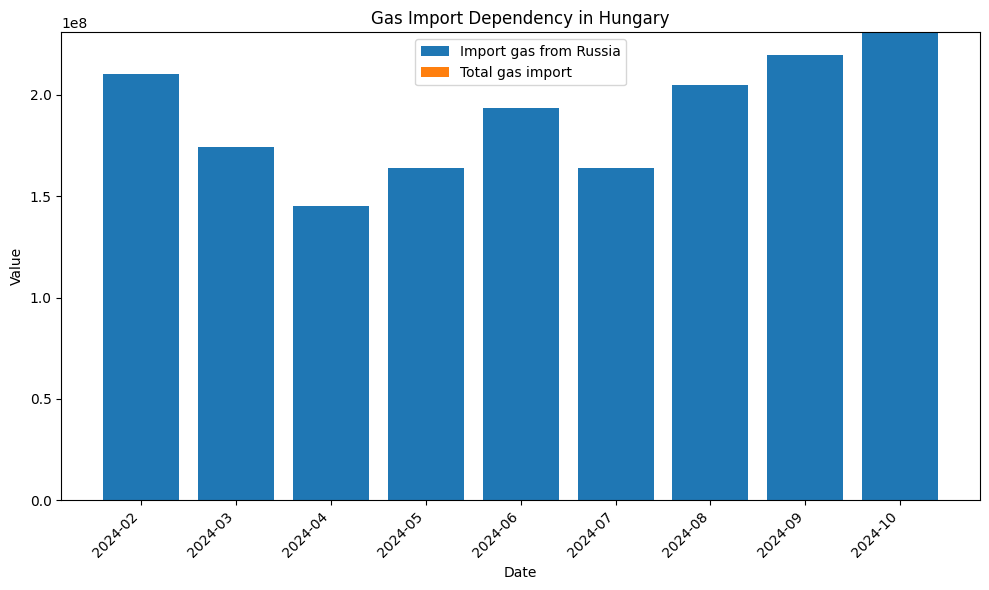

In [88]:
#Draw the chart for Hungary
# set size,style
plt.figure(figsize=(10, 6))

# draw bar chart
plt.bar(H_data['Date'], H_data['Import gas from Russia'], label='Import gas from Russia')
plt.bar(H_data['Date'], H_data['Total gas import'],
        bottom=H_data['Import gas from Russia'], label='Total gas import')

# add titles
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Gas Import Dependency in Hungary')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

# show the chart
plt.tight_layout()
plt.show()

In [83]:
#Slovakia RU import
S_values = Slovakia.loc[20]
S_date = Slovakia.loc[8]
Slovakia_RUdata = pd.concat([S_date, S_values], axis=1)
Slovakia_RUdata = Slovakia_RUdata.rename(columns=Slovakia_RUdata.iloc[0]).drop(Slovakia_RUdata.index[0])
Slovakia_RUdata = Slovakia_RUdata.iloc[1:]
Slovakia_RUdata = Slovakia_RUdata.rename(columns={'Russian Federation (Russia)': 'Import gas from Russia', 'TIME': 'Date'})
Slovakia_RUdata.index = range(len(Slovakia_RUdata.index))
Slovakia_RUdata = Slovakia_RUdata.loc[433:441]
Slovakia_RUdata.index = range(len(Slovakia_RUdata.index))
Slovakia_RUdata

,Date,Import gas from Russia
0,2024-02,97465101
1,2024-03,83992107
2,2024-04,83832138
3,2024-05,89794108
4,2024-06,104317311
5,2024-07,115780784
6,2024-08,106566283
7,2024-09,125468549
8,2024-10,123987816


In [78]:
Total_value.columns = range(len(Total_value.columns))
S_total_values = Total_value.loc[35]
S_total_dates = Total_value.loc[8]
S_total_data = pd.concat([S_total_dates, S_total_values], axis=1)
S_total_data.columns = S_total_data.iloc[0]
S_total_data = S_total_data[1:]
S_total_data = S_total_data.iloc[:17:2]
S_total_data.index = range(len(S_total_data.index))
S_total_data

,TIME,Slovakia
0,2024-02,1355.489
1,2024-03,1424.539
2,2024-04,1410.296
3,2024-05,1480.371
4,2024-06,1538.705
5,2024-07,1546.822
6,2024-08,1529.414
7,2024-09,1364.907
8,2024-10,1532.868


In [77]:
Total_value


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Dataset:,Imports of natural gas by partner country - mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last updated:,18/12/2024 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Time frequency,NaN,Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Standard international energy product classifi...,NaN,Natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Geopolitical entity (partner),NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Unit of measure,NaN,Million cubic metres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TIME,2024-02,NaN,2024-03,NaN,2024-04,NaN,2024-05,NaN,2024-06,...,2024-07,NaN,2024-08,NaN,2024-09,NaN,2024-10,NaN,2024-11,NaN
9,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
